In [1]:
import warnings

warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline

In [3]:
%load_ext blackcellmagic

In [4]:
#2018
from zipfile import ZipFile

directory_18 = r"F:\Ecobee\files\2018_sac"
df_sac_18_hourly_24h = pd.DataFrame()
import datetime

for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=["DateTime"])
    df_temp1 = df_temp[df_temp.HvacMode=='cool']
    df_temp1["Date"] = df_temp1["DateTime"].dt.date
    df_temp1["HourOfDay"] = df_temp1["DateTime"].dt.hour
    df_temp1["user_id"] = filename[:-8]
    df_temp1 = df_temp1[
        (df_temp1["DateTime"].dt.month >= 6) & (df_temp1["DateTime"].dt.month <= 9)
    ]  # summer days only

    df_day = (
        df_temp1.groupby(["Date", "HourOfDay"])
        .agg(
            avg_set_point_cool=pd.NamedAgg(column="T_stp_cool", aggfunc=np.mean),
            user_id=pd.NamedAgg(column="user_id", aggfunc=min),
        )
        .reset_index()
    )
#     df_day['hourly_total_cooling'] = df_day['hourly_total_cooling'] / 3600
    df_sac_18_hourly_24h = pd.concat([df_sac_18_hourly_24h, df_day])
    g.close()
    myzip.close()

In [5]:
df_sac_18_hourly_24h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255552 entries, 0 to 238
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                255552 non-null  object 
 1   HourOfDay           255552 non-null  int64  
 2   avg_set_point_cool  253725 non-null  float64
 3   user_id             255552 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 9.7+ MB


In [6]:
df_sac_18_hourly_24h.head()

,Date,HourOfDay,avg_set_point_cool,user_id
0,2018-06-01,13,71.777778,00e2f68ec737f7480114a67bbef7c5f65b6b8516
1,2018-06-01,14,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
2,2018-06-01,15,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
3,2018-06-01,16,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
4,2018-06-01,17,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516


In [7]:
# df_sac_18_daily_24h.head()

In [10]:
# 2019
from zipfile import ZipFile

directory_19 = r"F:\Ecobee\files\2019_sac"
df_sac_19_hourly_24h = pd.DataFrame()
import datetime

for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=["DateTime"])
    df_temp1 = df_temp[df_temp.HvacMode == "cool"]
    df_temp1["Date"] = df_temp1["DateTime"].dt.date
    df_temp1["HourOfDay"] = df_temp1["DateTime"].dt.hour
    df_temp1["user_id"] = filename[:-8]
    df_temp1 = df_temp1[
        (df_temp1["DateTime"].dt.month >= 6) & (df_temp1["DateTime"].dt.month <= 9)
    ]  # summer days only
    df_day = (
        df_temp1.groupby(["Date", "HourOfDay"])
        .agg(
            avg_set_point_cool=pd.NamedAgg(column="T_stp_cool", aggfunc=np.mean),
            user_id=pd.NamedAgg(column="user_id", aggfunc=min),
        )
        .reset_index()
    )
    #     df_day["hourly_total_cooling"] = df_day["hourly_total_cooling"] / 3600
    df_sac_19_hourly_24h = pd.concat([df_sac_19_hourly_24h, df_day])
    f.close()
    myzip.close()

In [11]:
df_sac_19_hourly_24h.head()

,Date,HourOfDay,avg_set_point_cool,user_id
0,2019-06-02,19,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
1,2019-06-02,20,77.833333,00e2f68ec737f7480114a67bbef7c5f65b6b8516
2,2019-06-02,21,77.500000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
3,2019-06-02,22,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
4,2019-06-02,23,77.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516


In [12]:
df_sac_18n19_hourly_24h=pd.concat([df_sac_18_hourly_24h,df_sac_19_hourly_24h])
df_sac_18n19_hourly_24h.head()

,Date,HourOfDay,avg_set_point_cool,user_id
0,2018-06-01,13,71.777778,00e2f68ec737f7480114a67bbef7c5f65b6b8516
1,2018-06-01,14,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
2,2018-06-01,15,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
3,2018-06-01,16,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516
4,2018-06-01,17,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516


In [13]:
df_sac_18n19_hourly_24h['year']=pd.to_datetime(df_sac_18n19_hourly_24h['Date'], errors='coerce').dt.year
df_sac_18n19_hourly_24h['count'] = df_sac_18n19_hourly_24h.groupby('user_id')['user_id'].transform('count')
pd.set_option('display.max_rows', None)
df_sac_18n19_hourly_24h['count'].value_counts().reset_index().sort_values('index',ascending=False)

,index,count
2,5782,11564
5,5775,5775
6,5772,5772
7,5771,5771
8,5770,5770
9,5767,5767
10,5765,5765
11,5763,5763
12,5760,5760
13,5758,5758


In [14]:
df_sac_18n19_hourly_24h.head()

,Date,HourOfDay,avg_set_point_cool,user_id,year,count
0,2018-06-01,13,71.777778,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2018,5713
1,2018-06-01,14,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2018,5713
2,2018-06-01,15,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2018,5713
3,2018-06-01,16,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2018,5713
4,2018-06-01,17,73.000000,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2018,5713


In [15]:
year_count_by_uid = df_sac_18n19_hourly_24h.groupby('user_id')['year'].nunique().reset_index().rename(columns={"year": "years_count"})
df_sac_18n19_hourly_24h=pd.merge(year_count_by_uid,df_sac_18n19_hourly_24h,how='left', on='user_id')
# df_sac_18n19_hourly_24h.describe()

In [16]:
df_sac_18n19_hourly_24h.describe()

,years_count,HourOfDay,avg_set_point_cool,year,count
count,815035.000000,815035.000000,809640.000000,815035.000000,815035.000000
mean,1.640985,11.637927,77.498770,2018.686453,3838.775992
std,0.479712,6.929072,4.666760,0.463935,1547.434005
min,1.000000,0.000000,60.000000,2018.000000,1.000000
25%,1.000000,6.000000,74.083333,2018.000000,2775.000000
50%,2.000000,12.000000,77.000000,2019.000000,3528.000000
75%,2.000000,18.000000,80.000000,2019.000000,5519.000000
max,2.000000,23.000000,100.000000,2019.000000,5782.000000


In [17]:
#keep only years_count=2
df_sac_18n19_hourly_24h=df_sac_18n19_hourly_24h[df_sac_18n19_hourly_24h['years_count']==2]

In [18]:
df_sac_18n19_hourly_24h.describe()

,years_count,HourOfDay,avg_set_point_cool,year,count
count,522425.0,522425.000000,518860.000000,522425.000000,522425.000000
mean,2.0,11.638936,77.627721,2018.533439,4642.849207
std,0.0,6.921448,4.698702,0.498881,1296.585034
min,2.0,0.000000,62.666667,2018.000000,19.000000
25%,2.0,6.000000,74.000000,2018.000000,4032.000000
50%,2.0,12.000000,77.000000,2019.000000,5154.000000
75%,2.0,18.000000,80.000000,2019.000000,5695.000000
max,2.0,23.000000,92.000000,2019.000000,5782.000000


In [19]:
df_sac_18n19_hourly_24h.head()

,user_id,years_count,Date,HourOfDay,avg_set_point_cool,year,count
0,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,13,71.777778,2018,5713
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,14,73.000000,2018,5713
2,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,15,73.000000,2018,5713
3,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,16,73.000000,2018,5713
4,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,17,73.000000,2018,5713


In [20]:
###from older codes
# #remove user_ids that have no cooling consumption at all for 2018
# df_18n19_temp=df_sac_18n19_hourly_24h
# df_sac_18n19_hourly_24h['Date'] = pd.to_datetime(df_sac_18n19_hourly_24h['Date'], errors='coerce')
# df_18n19_temp['year']=df_sac_18n19_hourly_24h['Date'].dt.year
# df_18n19_temp.describe()
# # [['user_id', 'daily_total_cooling']].groupby('user_id').max().reset_index()
# # df_18_temp['any_usage']=(df_18_temp.daily_total_cooling>0)
# # df_18_temp=df_18_temp['user_id'][df_18_temp['any_usage']==True]
# # df_sac_18_daily_midpeak=pd.merge(df_18_temp,df_sac_18_daily_midpeak,how='left', on='user_id')

In [21]:
df_sac_18n19_hourly_24h['count'].value_counts().reset_index().sort_values('index',ascending=False)
#there user_ids with only a few obs but two years of data because we only kept HvacMode=cool

,index,count
0,5782,11564
1,5775,5775
2,5772,5772
3,5771,5771
4,5770,5770
5,5767,5767
6,5765,5765
7,5763,5763
8,5760,5760
9,5758,5758


In [22]:
# df_sac_18n19_hourly_24h[df_sac_18n19_hourly_24h['count']==3985]

In [23]:
df_sac_18n19_hourly_24h=df_sac_18n19_hourly_24h[df_sac_18n19_hourly_24h['count']>2000]
df_sac_18n19_hourly_24h['Date']=pd.to_datetime(df_sac_18n19_hourly_24h['Date'])
df_sac_18n19_hourly_24h.head()

,user_id,years_count,Date,HourOfDay,avg_set_point_cool,year,count
0,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,13,71.777778,2018,5713
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,14,73.000000,2018,5713
2,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,15,73.000000,2018,5713
3,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,16,73.000000,2018,5713
4,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,17,73.000000,2018,5713


In [24]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [25]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [26]:
df_sac_18n19_hourly_24h_w_temperature=pd.merge(df_sac_18n19_hourly_24h,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_hourly_24h_w_temperature.head()

,user_id,years_count,Date,HourOfDay,avg_set_point_cool,year,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,13,71.777778,2018,5713,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,14,73.000000,2018,5713,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
2,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,15,73.000000,2018,5713,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
3,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,16,73.000000,2018,5713,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
4,00e2f68ec737f7480114a67bbef7c5f65b6b8516,2,2018-06-01,17,73.000000,2018,5713,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49


In [27]:
df_sac_18n19_hourly_24h_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_hourly_24h_w_temperature['TAVG'] - 62
df_sac_18n19_hourly_24h_w_temperature['TAVG_less_62'] = df_sac_18n19_hourly_24h_w_temperature['TAVG_less_62'].apply(lambda x : x if x > 0 else 0)

In [28]:
df_sac_18n19_hourly_24h_w_temperature['y2019']=np.where(df_sac_18n19_hourly_24h_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_hourly_24h_w_temperature['Date'].dt.year==2019]
df_sac_18n19_hourly_24h_w_temperature.describe()

,years_count,HourOfDay,avg_set_point_cool,year,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,491599.0,491599.000000,488034.000000,491599.000000,491599.000000,491599.000000,491599.000000,491599.000000,491599.000000,491599.000000
mean,2.0,11.572619,77.669638,2018.529002,4849.622654,73.043769,90.773429,58.754700,11.073005,0.529002
std,0.0,6.931125,4.657945,0.499159,1023.006690,5.104794,7.117936,3.943872,5.030537,0.499159
min,2.0,0.000000,65.000000,2018.000000,2038.000000,58.000000,69.000000,45.000000,0.000000,0.000000
25%,2.0,6.000000,74.000000,2018.000000,4172.000000,69.000000,86.000000,56.000000,7.000000,0.000000
50%,2.0,12.000000,77.333333,2019.000000,5250.000000,73.000000,92.000000,59.000000,11.000000,1.000000
75%,2.0,18.000000,80.000000,2019.000000,5706.000000,77.000000,96.000000,61.000000,15.000000,1.000000
max,2.0,23.000000,92.000000,2019.000000,5782.000000,86.000000,105.000000,69.000000,24.000000,1.000000


In [29]:
df_sac_18n19_hourly_24h_w_temperature[
    'interaction'] = df_sac_18n19_hourly_24h_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_hourly_24h_w_temperature['y2019']

In [30]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_hourly_24h_w_temperature.groupby('user_id').apply(
    regress, 'avg_set_point_cool', ['TAVG_less_62','interaction']).reset_index()
results.head(10)

,user_id,TAVG_less_62,interaction,intercept
0,00e2f68ec737f7480114a67bbef7c5f65b6b8516,-0.014168,0.056518,77.006243
1,0614c5d47de23d61b21be2141907668a54bf45a0,0.125886,-0.405098,75.436902
2,0773f65bc76833bddd55f0f850ded5d14bc8ab99,NaN,NaN,NaN
3,084a2b8c0522a36209d062d852d04bb64494ea84,NaN,NaN,NaN
4,08a71736460f4b41fb6a69bd7d9194b907965809,-0.106132,0.162325,74.877117
5,0a59926c3e5e6948e70286673bd3a58f6e4da821,-0.021563,0.084863,72.963041
6,0aec426e98899420452f505669f36b1f47651c68,NaN,NaN,NaN
7,0ed748d62777165f02e04693fa57812603a16fa7,-0.087398,0.107394,70.663930
8,0f50223ca3a7c1def87d95d3696719692d5d3d33,-0.064703,0.111425,79.386108
9,134615e7ba0d12a861340bdeb47cb2e3e0ad718f,-0.020435,0.034019,78.147458


Text(0.5, 1.0, 'y=set_point_cool')

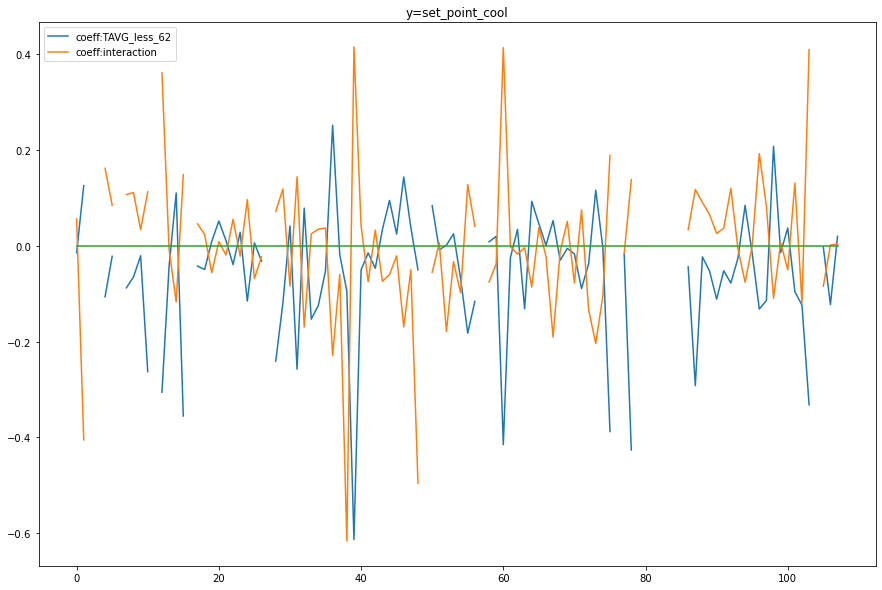

In [31]:
# x axis range
x = range(len(results))
plt.figure(figsize=(15,10))
# y2
plt.plot(x,results['TAVG_less_62'],label='coeff:TAVG_less_62')
# y2
plt.plot(x,results['interaction'],label='coeff:interaction')
# y=0 line 
plt.plot(x,[0] * len(results))
plt.legend(loc="upper left")
plt.title('y=set_point_cool')

In [32]:
# print(results[results.interaction > 0.01].count())
# print(results[results.interaction < -0.01].count())

In [33]:
# print(results['interaction'][results.interaction > 0.01].sum())
# print(results['interaction'][results.interaction < -0.01].sum())
# # the sum of negative interaction coefficients has a larger scale

In [34]:
df_sac_18n19_hourly_24h_w_temperature['const']=1
list_1=list(['df_hour_']*24)
list_2_int=list(range(24))
list_2_str = [str(int) for int in list_2_int] 
list_3 = [i + j for i, j in zip(list_1, list_2_str)]
# print(list_3)
for i in range(24):
    globals()['df_hour_+str(i)'] = list_3[i]
#     print(globals()['df_hour_+str(i)'])
list_1=list(['reg_result_']*24)
# list_2_int=list(range(24))
# list_2_str = [str(int) for int in list_2_int] 
list_3 = [i + j for i, j in zip(list_1, list_2_str)]
for i in range(24):
    globals()['reg_result+str(i)'] = list_3[i]
#     print(globals()['reg_result+str(i)'])
list_of_results=[]
for h in range(24):    
    reg_data=df_sac_18n19_hourly_24h_w_temperature[df_sac_18n19_hourly_24h_w_temperature['HourOfDay']==h]
    globals()['df_hour_+str(h)']  = sm.OLS(endog=reg_data['avg_set_point_cool'], \
              exog=reg_data[['TAVG_less_62','interaction','const']], \
                missing='drop')
    globals()['reg_result+str(i)'] =  globals()['df_hour_+str(h)'].fit(cov_type='HC1')
    print('Results for hour *******************'+str(h)+'*******************')
    print('\n')
    print(globals()['reg_result+str(i)'].summary())
    list_of_results.append(globals()['reg_result+str(i)'])

Results for hour *******************0*******************


                            OLS Regression Results                            
Dep. Variable:     avg_set_point_cool   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     39.62
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           6.74e-18
Time:                        23:06:08   Log-Likelihood:                -59422.
No. Observations:               20231   AIC:                         1.189e+05
Df Residuals:                   20228   BIC:                         1.189e+05
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [35]:
interaction_coeffs=[]
for i in range(24):
    interaction_coeffs.append(list_of_results[i].params[1])
    
print(interaction_coeffs)
interaction_coeffs = []
for i in range(24):
    interaction_coeffs.append(list_of_results[i].params[1])

print(interaction_coeffs)
interaction_coeff_se = []
for i in range(24):
    interaction_coeff_se.append(list_of_results[i].bse[1])
print(interaction_coeff_se)
interaction_coeffs_plusSE = [
    a + b for a, b in zip(interaction_coeffs, interaction_coeff_se)
]
print(interaction_coeffs_plusSE)
interaction_coeffs_minusSE = [
    a - b for a, b in zip(interaction_coeffs, interaction_coeff_se)
]
print(interaction_coeffs_minusSE)

[0.0057322244979819085, 0.00439542666867109, 0.004811243453853414, 0.004615063387011353, 0.005490257830158088, 3.705770127145156e-05, 0.016649400042187033, 0.013806908882697224, 0.0039745136496886725, 0.008916906010683552, 0.01698574265482559, 0.011545705438782392, 0.013457896413749644, 0.007973710034258747, 0.0015972263444546816, -0.0022976280459198685, -0.03297932225471646, 0.01857909088445933, 0.021837437459953916, 0.031594757891125334, -0.008984486112864062, -0.009777362766501135, 0.003122727043469637, 0.010213806914901716]
[0.0057322244979819085, 0.00439542666867109, 0.004811243453853414, 0.004615063387011353, 0.005490257830158088, 3.705770127145156e-05, 0.016649400042187033, 0.013806908882697224, 0.0039745136496886725, 0.008916906010683552, 0.01698574265482559, 0.011545705438782392, 0.013457896413749644, 0.007973710034258747, 0.0015972263444546816, -0.0022976280459198685, -0.03297932225471646, 0.01857909088445933, 0.021837437459953916, 0.031594757891125334, -0.008984486112864062,

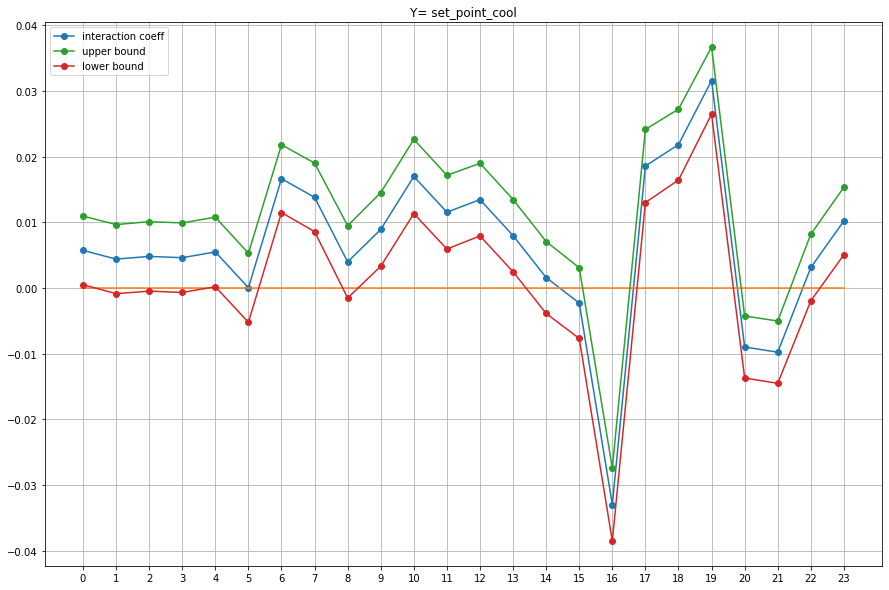

In [36]:
# x axis range
x = range(len(interaction_coeffs))
plt.figure(figsize=(15,10))
# y
plt.plot(x,interaction_coeffs,'o-', label='interaction coeff')
plt.plot(x,[0] * len(interaction_coeffs))
plt.plot(x,interaction_coeffs_plusSE,'o-', label='upper bound')
plt.plot(x,interaction_coeffs_minusSE,'o-', label='lower bound')
plt.legend(loc="upper left")
plt.xticks(x)
plt.grid()
plt.title("Y= set_point_cool")
plt.show()

In [37]:
df_sac_18n19_hourly_24h.user_id.nunique()

108